<a href="https://colab.research.google.com/github/Bimalv01/Natural-Language-Process/blob/main/lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nltk gensim scikit-learn pyLDAvis


In [5]:
# Import necessary libraries
import nltk
import string
import matplotlib.pyplot as plt
import pyLDAvis.gensim as gensimvis
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from gensim.models import Word2Vec
import numpy as np


In [6]:
# Download NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Data Collection: Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

In [8]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [4]:

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [9]:
# Preprocess all documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Topic Modeling with LDA
# Create dictionary and corpus
dictionary = corpora.Dictionary([doc.split() for doc in processed_docs])
corpus = [dictionary.doc2bow(doc.split()) for doc in processed_docs]

In [10]:
# Apply LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

In [11]:
# Display topics
topics = lda_model.print_topics(num_words=10)
print("Discovered Topics:")
for topic in topics:
    print(topic)

# Visualization of Topics using pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Discovered Topics:
(0, '0.010*"car" + 0.007*"line" + 0.006*"one" + 0.006*"writes" + 0.006*"would" + 0.006*"organization" + 0.006*"subject" + 0.005*"like" + 0.005*"article" + 0.005*"get"')
(1, '0.015*"subject" + 0.015*"line" + 0.015*"organization" + 0.008*"article" + 0.007*"university" + 0.007*"writes" + 0.007*"nntppostinghost" + 0.006*"would" + 0.005*"one" + 0.005*"know"')
(2, '0.009*"israel" + 0.008*"jew" + 0.007*"q" + 0.007*"israeli" + 0.006*"state" + 0.006*"president" + 0.006*"arab" + 0.004*"government" + 0.004*"war" + 0.004*"mr"')
(3, '0.013*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.012*"key" + 0.009*"window" + 0.009*"line" + 0.009*"subject" + 0.008*"organization" + 0.006*"b" + 0.006*"use" + 0.005*"version" + 0.005*"ripem"')
(4, '0.012*"armenian" + 0.006*"turkish" + 0.005*"line" + 0.005*"subject" + 0.004*"year" + 0.004*"game" + 0.004*"organization" + 0.004*"team" + 0.004*"turk" + 0.004*"player"')
(5, '0.012*"line" + 0.011*"subject" + 0.011*"organization" + 0.007*"system" + 0.006*"drive

In [13]:
# Save the visualization as an HTML file
pyLDAvis.save_html(vis, 'lda_topics.html')

#Document Similarity using LDA-based Vectors
# Get LDA topic distribution vectors for each document
lda_vectors = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in corpus]
lda_vectors = [[topic_prob for _, topic_prob in doc] for doc in lda_vectors]

In [14]:
# Calculate cosine similarity between documents for LDA vectors
lda_similarity = cosine_similarity(lda_vectors)

In [15]:
# Generate Word2Vec Model
sentences = [doc.split() for doc in processed_docs]  # Split documents into sentences for Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [16]:
# Generate Document Vectors using Word2Vec
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv]
    return np.mean(word2vec_model.wv[doc], axis=0)

word2vec_vectors = np.array([document_vector(doc.split()) for doc in processed_docs])

# Calculate cosine similarity for Word2Vec-based vectors
word2vec_similarity = cosine_similarity(word2vec_vectors)

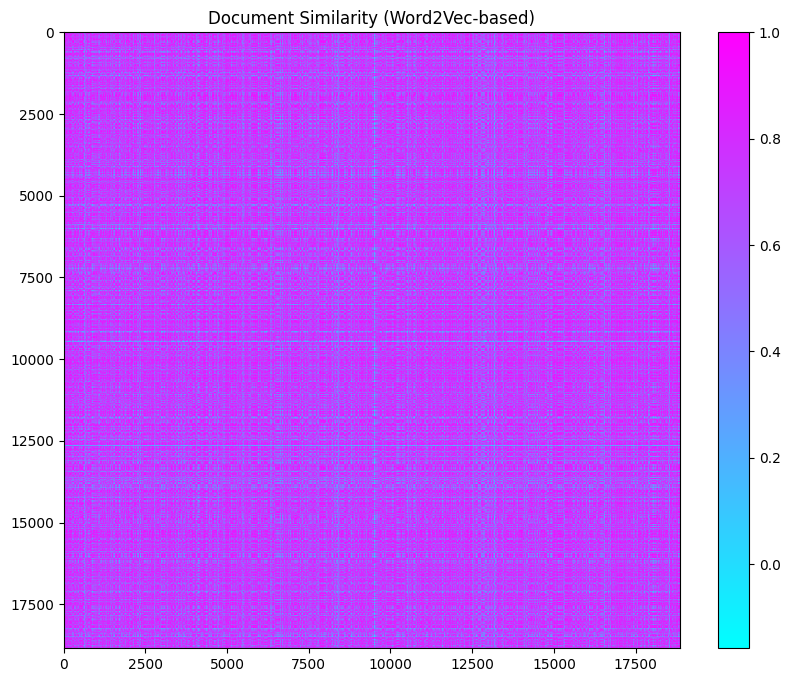

In [17]:
# Visualization of Document Similarity using Word2Vec
plt.figure(figsize=(10, 8))
plt.imshow(word2vec_similarity, cmap='cool', interpolation='nearest')
plt.title('Document Similarity (Word2Vec-based)')
plt.colorbar()
plt.show()

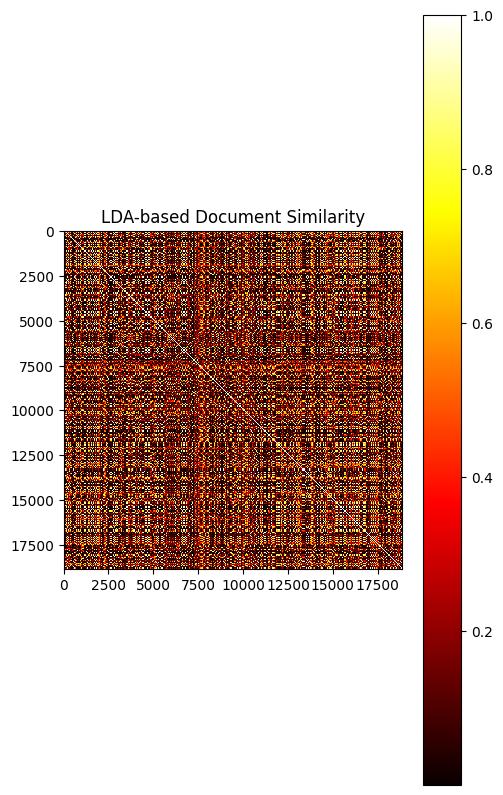

In [18]:
# Compare LDA and Word2Vec Similarity Matrices
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(lda_similarity, cmap='hot', interpolation='nearest')
plt.title('LDA-based Document Similarity')
plt.colorbar()

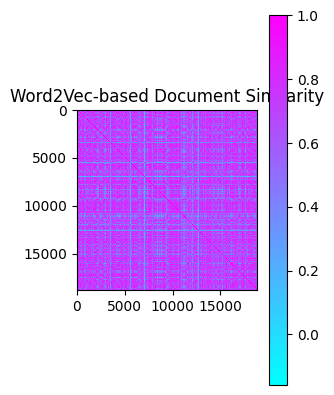

In [19]:
plt.subplot(1, 2, 2)
plt.imshow(word2vec_similarity, cmap='cool', interpolation='nearest')
plt.title('Word2Vec-based Document Similarity')
plt.colorbar()

plt.show()

In [1]:
# Compare similarity between LDA and Word2Vec similarities
correlation = np.corrcoef(lda_similarity.flatten(), word2vec_similarity.flatten())[0, 1]
print(f"Correlation between LDA-based and Word2Vec-based document similarities: {correlation:.4f}")

NameError: name 'np' is not defined